In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split


In [54]:
df=pd.read_csv('C:/Users/san/Downloads/StudentsPerformance.csv')

In [55]:
display(df.head(2))
display(df.shape)
display(df.info())
display(df.describe())


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


(1000, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [56]:
X=df.drop('math score',axis=1)
y=df['math score']

In [57]:
X.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [58]:
sc=StandardScaler()
X[['reading score','writing score']]=sc.fit_transform(X[['reading score','writing score']])

In [60]:
X.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.193999,0.391492
1,female,group C,some college,standard,completed,1.427476,1.313269


In [61]:
cat_cols=[feat for feat in X.columns if X[feat].dtypes=='O']
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [62]:
for i in cat_cols:
    print(f"the unique values of {i} is {X[i].unique()}")

the unique values of gender is ['female' 'male']
the unique values of race/ethnicity is ['group B' 'group C' 'group A' 'group D' 'group E']
the unique values of parental level of education is ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the unique values of lunch is ['standard' 'free/reduced']
the unique values of test preparation course is ['none' 'completed']


In [63]:
#since these three are having only 2 unique values , we can use same col name for creating dummy variable, so no need to rename them;
#remaining 2 cols are having 4  classes so we need to create dummy varaibles and do OHE and assign them to X

X['gender']=pd.get_dummies(X['gender'],drop_first=True,dtype='int')
X['lunch']=pd.get_dummies(X['lunch'],drop_first=True,dtype='int')
X['test preparation course']=pd.get_dummies(X['test preparation course'],drop_first=True,dtype='int')
    


In [64]:
X.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,group B,bachelor's degree,1,1,0.193999,0.391492
1,0,group C,some college,1,0,1.427476,1.313269


In [65]:
d=pd.get_dummies(X['race/ethnicity'],drop_first=True,dtype='int')
e=pd.get_dummies(X['parental level of education'],drop_first=True,dtype='int')


In [66]:
X=pd.concat([X,d],axis=1)
X.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,group B,group C,group D,group E
0,0,group B,bachelor's degree,1,1,0.193999,0.391492,1,0,0,0
1,0,group C,some college,1,0,1.427476,1.313269,0,1,0,0


In [67]:
X=pd.concat([X,e],axis=1)
X.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school
0,0,group B,bachelor's degree,1,1,0.193999,0.391492,1,0,0,0,1,0,0,0,0
1,0,group C,some college,1,0,1.427476,1.313269,0,1,0,0,0,0,0,1,0


In [68]:
X=X.drop(['race/ethnicity','parental level of education'],axis=1)
X.head()

,gender,lunch,test preparation course,reading score,writing score,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school
0,0,1,1,0.193999,0.391492,1,0,0,0,1,0,0,0,0
1,0,1,0,1.427476,1.313269,0,1,0,0,0,0,0,1,0
2,0,1,1,1.770109,1.642475,1,0,0,0,0,0,1,0,0
3,1,0,1,-0.833899,-1.583744,0,0,0,0,0,0,0,0,0
4,1,1,1,0.605158,0.457333,0,1,0,0,0,0,0,1,0


In [69]:
X.shape

(1000, 14)

In [80]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=10)
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)

(750, 14)
(250, 14)
(750,)
(250,)


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


lr=LinearRegression()
lr.fit(Xtr,ytr)
ypred_tr=lr.predict(Xtr)
ypred_te=lr.predict(Xte)
mse_tr=mean_squared_error(ytr,ypred_tr)
mse_te=mean_squared_error(yte,ypred_te)
mae_tr=mean_absolute_error(ytr,ypred_tr)
mae_te=mean_absolute_error(yte,ypred_te)
r2_sqr_tr=r2_score(ytr,ypred_tr)
r2_sqr_te=r2_score(ytr,ypred_tr)
rmse_tr=np.sqrt(r2_sqr_tr)
rmse_te=np.sqrt(r2_sqr_te)
print(f"the training score meansquared error is : {mse_tr} \n \
the testing score meansquared error is : {mse_te} \n \
the training score meanabsolute error is {mae_tr}\n \
the testing score meanabsolute error is {mae_te} \n")

the training score meansquared error is : 27.9846043060193 
 the testing score meansquared error is : 30.089753127202524 
 the training score meanabsolute error is 4.228974734874375
 the testing score meanabsolute error is 4.355337709192901 



In [99]:
def eval_models(ytrue,ypred):
    mse=mean_squared_error(ytrue,ypred)
    mae=mean_absolute_error(ytrue,ypred)
    rmse=np.sqrt(mse)
    rsquared=r2_score(ytrue,ypred)
    return mse,mae,rmse,rsquared

In [110]:
!pip install catboost
!pip install xgboost

In [134]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor



from catboost import CatBoostRegressor
from xgboost import XGBRegressor


r2scor=[]
list_of_models={'linearregression':LinearRegression(),
                'kneighbors':KNeighborsRegressor(),
                'DecisionTree':DecisionTreeRegressor(),
                'RandomForest':RandomForestRegressor(),
                'Ridge':Ridge(),
                'Lasso':Lasso(),
                'AdaBoost':AdaBoostRegressor(),
                'XGBoost':XGBRegressor(),
                'CatBoost':CatBoostRegressor(verbose=False)
               }

for key,model in list_of_models.items():
    model.fit(Xtr,ytr)
    ypred_tr=model.predict(Xtr)
    ypred_te=model.predict(Xte)
    eval_models(ytr,ypred_tr)
    print('-----------------------------------------')
    print(key)
    print('-----------------------------------------')
    print("the training evaluation :")
    mse1,mae1,rmse1,rsquared1=eval_models(ytr,ypred_tr)
    print("training mse:{:.4f}\ntraining mae:{:.4f}\ntraining rmse : {:.4f}\ntraining r2score : {:.4f}\n".format(mse1,mae1,rmse1,rsquared1))
    print('*********************************************')
    print("the testing evaluation :")
    mse2,mae2,rmse2,rsquared2=eval_models(yte,ypred_te)
    r2scor.append(rsquared2)
    print("testing mse:{:.4f}\ntesting mae:{:.4f}\ntesting rmse : {:.4f}\ntesting r2score : {:.4f}\n".format(mse2,mae2,rmse2,rsquared2))

-----------------------------------------
linearregression
-----------------------------------------
the training evaluation :
training mse:27.9846
training mae:4.2290
training rmse : 5.2900
training r2score : 0.8821

*********************************************
the testing evaluation :
testing mse:30.0898
testing mae:4.3553
testing rmse : 5.4854
testing r2score : 0.8533

-----------------------------------------
kneighbors
-----------------------------------------
the training evaluation :
training mse:34.2164
training mae:4.6827
training rmse : 5.8495
training r2score : 0.8558

*********************************************
the testing evaluation :
testing mse:42.6838
testing mae:5.2000
testing rmse : 6.5333
testing r2score : 0.7919

-----------------------------------------
DecisionTree
-----------------------------------------
the training evaluation :
training mse:0.1473
training mae:0.0253
training rmse : 0.3838
training r2score : 0.9994

*****************************************

In [130]:
print(list_of_models.keys())
print(list_of_models.values())
for k,model in list_of_models.items():
    print(k)
    print(model)

dict_keys(['linearregression', 'kneighbors', 'DecisionTree', 'RandomForest', 'Ridge', 'Lasso', 'AdaBoost', 'XGBoost', 'CatBoost'])
dict_values([LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso(), AdaBoostRegressor(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num

model_select=pd.DataFrame()
model_select['model_name']=pd.DataFrame(list_of_models.keys())
model_select['r2score']=pd.DataFrame(r2scor)

In [141]:
model_select.sort_values(by='r2score',ascending=False)

,model_name,r2score
4,Ridge,0.853992
0,linearregression,0.853297
8,CatBoost,0.830931
3,RandomForest,0.822691
6,AdaBoost,0.809065
5,Lasso,0.807487
7,XGBoost,0.798273
1,kneighbors,0.791894
2,DecisionTree,0.643346


#### LinearRegression

In [142]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(Xtr, ytr)
y_pred = lin_model.predict(Xte)
score = r2_score(yte, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.33


#### plot between ytest and ypred

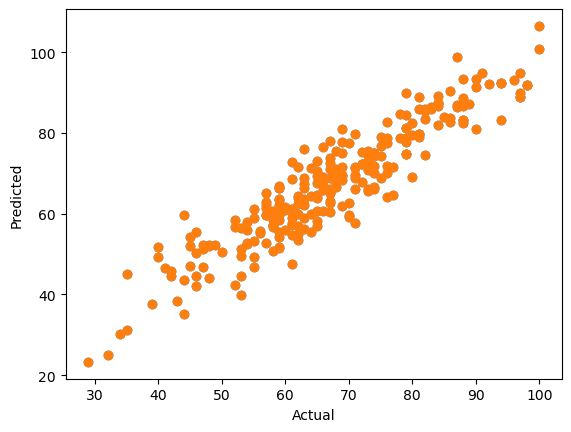

In [144]:
plt.scatter(yte,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

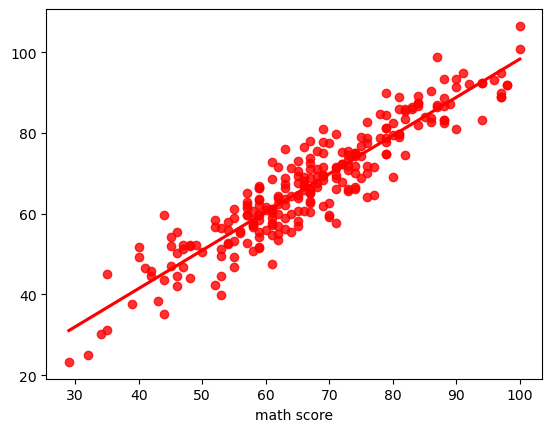

In [148]:
sns.regplot(x=yte,y=y_pred,ci=None,color ='red');
plt.show()

### difference between actual and predictewd values

In [150]:
pred_df=pd.DataFrame({'Actual Value':yte,'Predicted Value':y_pred,'Difference':yte-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
841,64,59.950097,4.049903
956,84,89.142213,-5.142213
544,64,55.403449,8.596551
173,63,62.112662,0.887338
759,69,81.083268,-12.083268
...,...,...,...
800,67,72.613286,-5.613286
217,34,30.137466,3.862534
565,48,52.323956,-4.323956
486,61,57.081272,3.918728


In [151]:
n=int(input("enter the value:"))
for i in range(n):
    for j in range(n-i):
        print(i,end=' ')
    print()

enter the value: 5


0 0 0 0 0 
1 1 1 1 
2 2 2 
3 3 
4 


In [ ]:
          *
        *   *
      *   *   *
   *    *    *    *